In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
X_train = X_train.astype("float32") / 255

In [10]:
X_test = X_test.astype("float32") / 255

In [11]:
X_train = np.expand_dims(X_train, -1)

In [17]:
X_test = np.expand_dims(X_test, -1)

In [19]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [24]:
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=input_shape),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation="softmax"),
])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [27]:
batch_size = 128
epochs = 15
lr = 1e-3

In [28]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=lr), metrics=["accuracy"])


In [29]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 13s 34ms/step - loss: 0.3772 - accuracy: 0.8862 - val_loss: 0.1050 - val_accuracy: 0.9708
Epoch 2/15
375/375 [==============================] - 14s 37ms/step - loss: 0.1163 - accuracy: 0.9641 - val_loss: 0.0742 - val_accuracy: 0.9778
Epoch 3/15
375/375 [==============================] - 14s 37ms/step - loss: 0.0890 - accuracy: 0.9737 - val_loss: 0.0575 - val_accuracy: 0.9835
Epoch 4/15
375/375 [==============================] - 14s 36ms/step - loss: 0.0725 - accuracy: 0.9776 - val_loss: 0.0498 - val_accuracy: 0.9859
Epoch 5/15
375/375 [==============================] - 13s 35ms/step - loss: 0.0648 - accuracy: 0.9799 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 6/15
375/375 [==============================] - 14s 36ms/step - loss: 0.0575 - accuracy: 0.9820 - val_loss: 0.0423 - val_accuracy: 0.9873
Epoch 7/15
375/375 [==============================] - 13s 36ms/step - loss: 0.0542 - accuracy: 0.9836 - val_loss: 0.0421 - val_accuracy:

In [106]:
import matplotlib.pyplot as plt


def visualization(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

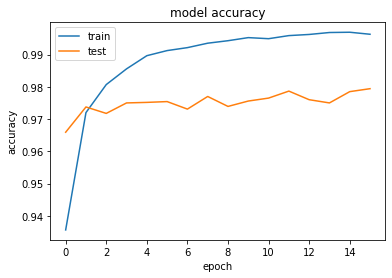

In [107]:
visualization(history)

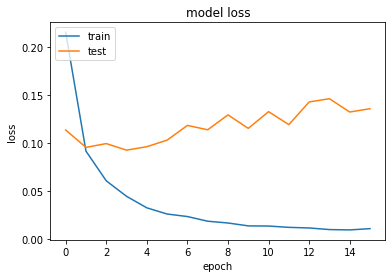

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [41]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [42]:
X_train.shape

(60000, 784)

In [43]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [44]:
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

In [47]:
z_dim = 100

In [48]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import InputLayer, Input, Dense, Dropout, LeakyReLU, Activation
from tensorflow.keras.optimizers import Adam

In [49]:
adam = Adam(lr=0.0002, beta_1=0.5)

# Mô hình Generator
generator = Sequential()
generator.add(Dense(256, input_dim=z_dim, activation=LeakyReLU(alpha=0.2)))
generator.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
generator.add(Dense(1024, activation=LeakyReLU(alpha=0.2)))
# Vì dữ liệu ảnh MNIST đã chuẩn hóa về [0, 1] nên hàm G khi sinh ảnh ra cũng cần sinh ra ảnh có pixel value trong khoảng [0, 1] => hàm sigmoid được chọn
generator.add(Dense(784, activation='sigmoid'))  
generator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Mô hình Discriminator
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, activation=LeakyReLU(alpha=0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512, activation=LeakyReLU(alpha=0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256, activation=LeakyReLU(alpha=0.2)))
discriminator.add(Dropout(0.3))
# Hàm sigmoid cho bài toán binary classification 
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

discriminator.trainable = False
inputs = Input(shape=(z_dim, ))
hidden = generator(inputs)
output = discriminator(hidden)
gan = Model(inputs, output)
gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

/home/namnd/anaconda3/envs/aihub/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [50]:
def plot_loss(losses):
    d_loss = [v[0] for v in losses["D"]]
    g_loss = [v[0] for v in losses["G"]]
    
    plt.figure(figsize=(10,8))
    plt.plot(d_loss, label="Discriminator loss")
    plt.plot(g_loss, label="Generator loss")
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Hàm vẽ sample từ Generator
def plot_generated(n_ex=10, dim=(1, 10), figsize=(12, 2)):
    noise = np.random.normal(0, 1, size=(n_ex, z_dim))
    generated_images = g.predict(noise)
    generated_images = generated_images.reshape(n_ex, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [114]:
losses = {"D":[], "G":[]}

def train(epochs=1, plt_frq=1, BATCH_SIZE=128):
    # Tính số lần chạy trong mỗi epoch
    batchCount = int(X_train.shape[0] / BATCH_SIZE)
    print('Epochs:', epochs)
    print('Batch size:', BATCH_SIZE)
    print('Batches per epoch:', batchCount)
    
    for e in range(1, epochs+1):
        for _ in range(batchCount):
            # Lấy ngẫu nhiên các ảnh từ MNIST dataset (ảnh thật)
            image_batch = X_train[np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)]
            # Sinh ra noise ngẫu nhiên
            noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            
            # Dùng Generator sinh ra ảnh từ noise
            generated_images = generator.predict(noise)
            X = np.concatenate((image_batch, generated_images))
            # Tạo label
            y = np.zeros(2*BATCH_SIZE)
            y[:BATCH_SIZE] = 0.9  # gán label bằng 1 cho những ảnh từ MNIST dataset và 0 cho ảnh sinh ra bởi Generator

            # Train discriminator
            discriminator.trainable = True
            d_loss = discriminator.train_on_batch(X, y)

            # Train generator
            noise = np.random.normal(0, 1, size=(BATCH_SIZE, z_dim))
            # Khi train Generator gán label bằng 1 cho những ảnh sinh ra bởi Generator -> cố gắng lừa Discriminator. 
            y2 = np.ones(BATCH_SIZE)
            # Khi train Generator thì không cập nhật hệ số của Discriminator.
            discriminator.trainable = False
            g_loss = gan.train_on_batch(noise, y2)

        # Lưu loss function
        losses["D"].append(d_loss)
        losses["G"].append(g_loss)


    plot_loss(losses)

Epochs: 10
Batch size: 128
Batches per epoch: 468


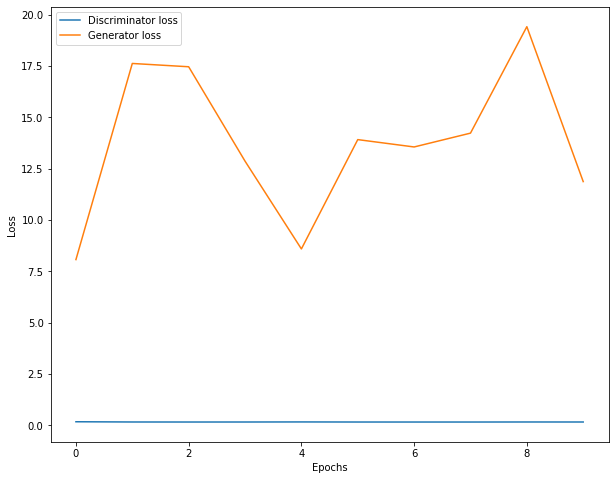

In [115]:
from tqdm import tqdm_notebook


train(epochs=10, plt_frq=20, BATCH_SIZE=128)


In [58]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [57]:
!pip install ipywidgets

     |████████████████████████████████| 121 kB 14 kB/s eta 0:00:01
  Using cached nbformat-5.1.3-py3-none-any.whl (178 kB)
     |████████████████████████████████| 243 kB 29 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 62 kB/s eta 0:00:01
     |████████████████████████████████| 69 kB 87 kB/s eta 0:00:01
  Using cached pyrsistent-0.18.0-cp37-cp37m-manylinux1_x86_64.whl (119 kB)
  Using cached attrs-21.2.0-py2.py3-none-any.whl (53 kB)
     |████████████████████████████████| 9.9 MB 67 kB/s eta 0:00:012
     |████████████████████████████████| 57 kB 21 kB/s eta 0:00:01
  Using cached terminado-0.12.1-py3-none-any.whl (15 kB)
  Using cached argon2_cffi-21.1.0-cp35-abi3-manylinux_2_5_x86_64.manylinux1_x86_64.whl (96 kB)
  Using cached tornado-6.1-cp37-cp37m-manylinux2010_x86_64.whl (428 kB)
  Using cached nbconvert-6.2.0-py3-none-any.whl (553 kB)
  Using cached Send2Trash-1.8.0-py3-none-any.whl (18 kB)
  Using cached cffi-1.15.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010

In [104]:
classifier = Sequential([
    InputLayer(input_shape=(784, )),
    Dense(256, activation="relu"),
    Dense(num_classes, activation="softmax")
])


callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)



classifier.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=["accuracy"])

In [76]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [77]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [102]:
classifier.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [82]:
X_train.shape

(60000, 784)

In [105]:
history = classifier.fit(X_train, y_train, batch_size=10, epochs=100, validation_split=0.2, callbacks=[callback])

Epoch 1/100
4800/4800 [==============================] - 14s 3ms/step - loss: 0.2155 - accuracy: 0.9356 - val_loss: 0.1138 - val_accuracy: 0.9659
Epoch 2/100
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0918 - accuracy: 0.9720 - val_loss: 0.0957 - val_accuracy: 0.9737
Epoch 3/100
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0609 - accuracy: 0.9807 - val_loss: 0.0996 - val_accuracy: 0.9718
Epoch 4/100
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0448 - accuracy: 0.9856 - val_loss: 0.0928 - val_accuracy: 0.9750
Epoch 5/100
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0964 - val_accuracy: 0.9752
Epoch 6/100
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.1032 - val_accuracy: 0.9754
Epoch 7/100
4800/4800 [==============================] - 14s 3ms/step - loss: 0.0238 - accuracy: 0.9921 - val_loss: 0.1186 -

In [111]:
classifier.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1357 - accuracy: 0.9799


[0.1357068419456482, 0.9799000024795532]